## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import energyefficiencyDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              943.4
Date:                Sun, 24 Jul 2022   Prob (F-statistic):                   2.49e-321
Time:                        16:04:42   Log-Likelihood:                         -111.78
No. Observations:                 614   AIC:                                      237.6
Df Residuals:                     607   BIC:                                      268.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

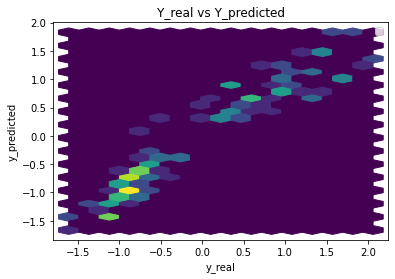

Performance Metrics
Mean Squared Error: 0.08283074921570571
Mean Absolute Error: 0.20085925355447606
Manhattan distance: 30.93232504738932
Euclidean distance: 3.571545236899384


Stats Model MAE 0.20085925355447606


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.037906
0:	learn: 0.9708953	total: 51.8ms	remaining: 51.8s
1:	learn: 0.9383625	total: 52.4ms	remaining: 26.1s
2:	learn: 0.9109425	total: 52.8ms	remaining: 17.6s
3:	learn: 0.8803959	total: 53.4ms	remaining: 13.3s
4:	learn: 0.8555605	total: 53.8ms	remaining: 10.7s
5:	learn: 0.8275663	total: 54.2ms	remaining: 8.98s
6:	learn: 0.8050591	total: 54.6ms	remaining: 7.75s
7:	learn: 0.7797853	total: 55ms	remaining: 6.82s
8:	learn: 0.7541618	total: 55.5ms	remaining: 6.11s
9:	learn: 0.7305169	total: 55.9ms	remaining: 5.53s
10:	learn: 0.7075508	total: 56.4ms	remaining: 5.07s
11:	learn: 0.6845469	total: 56.8ms	remaining: 4.67s
12:	learn: 0.6628706	total: 57.2ms	remaining: 4.34s
13:	learn: 0.6439520	total: 57.5ms	remaining: 4.05s
14:	learn: 0.6235559	total: 57.8ms	remaining: 3.79s
15:	learn: 0.6050961	total: 58.4ms	remaining: 3.59s
16:	learn: 0.5859799	total: 59.1ms	remaining: 3.42s
17:	learn: 0.5688114	total: 59.9ms	remaining: 3.27s
18:	learn: 0.5520794	total: 61.1ms	remaining: 

45:	learn: 0.2616871	total: 88.8ms	remaining: 1.84s
46:	learn: 0.2557855	total: 90.8ms	remaining: 1.84s
47:	learn: 0.2488255	total: 91.6ms	remaining: 1.82s
48:	learn: 0.2418872	total: 92.4ms	remaining: 1.79s
49:	learn: 0.2357906	total: 93.2ms	remaining: 1.77s
50:	learn: 0.2293689	total: 93.9ms	remaining: 1.75s
51:	learn: 0.2235369	total: 95ms	remaining: 1.73s
52:	learn: 0.2186935	total: 95.8ms	remaining: 1.71s
53:	learn: 0.2149496	total: 96.5ms	remaining: 1.69s
54:	learn: 0.2100179	total: 97.2ms	remaining: 1.67s
55:	learn: 0.2043300	total: 97.9ms	remaining: 1.65s
56:	learn: 0.1986393	total: 99.4ms	remaining: 1.64s
57:	learn: 0.1937059	total: 100ms	remaining: 1.63s
58:	learn: 0.1895863	total: 101ms	remaining: 1.61s
59:	learn: 0.1851443	total: 101ms	remaining: 1.59s
60:	learn: 0.1802013	total: 102ms	remaining: 1.57s
61:	learn: 0.1771065	total: 102ms	remaining: 1.55s
62:	learn: 0.1723164	total: 103ms	remaining: 1.53s
63:	learn: 0.1684658	total: 104ms	remaining: 1.52s
64:	learn: 0.1642038	

77:	learn: 0.1240651	total: 114ms	remaining: 1.35s
78:	learn: 0.1213606	total: 115ms	remaining: 1.34s
79:	learn: 0.1184670	total: 116ms	remaining: 1.33s
80:	learn: 0.1157291	total: 117ms	remaining: 1.32s
81:	learn: 0.1133911	total: 118ms	remaining: 1.31s
82:	learn: 0.1112609	total: 118ms	remaining: 1.31s
83:	learn: 0.1089459	total: 120ms	remaining: 1.31s
84:	learn: 0.1065799	total: 123ms	remaining: 1.32s
85:	learn: 0.1044357	total: 124ms	remaining: 1.31s
86:	learn: 0.1031540	total: 124ms	remaining: 1.3s
87:	learn: 0.1013543	total: 125ms	remaining: 1.3s
88:	learn: 0.1001021	total: 126ms	remaining: 1.28s
89:	learn: 0.0980636	total: 126ms	remaining: 1.28s
90:	learn: 0.0970130	total: 127ms	remaining: 1.27s
91:	learn: 0.0953792	total: 128ms	remaining: 1.26s
92:	learn: 0.0937782	total: 129ms	remaining: 1.26s
93:	learn: 0.0920933	total: 130ms	remaining: 1.25s
94:	learn: 0.0903775	total: 131ms	remaining: 1.24s
95:	learn: 0.0893123	total: 132ms	remaining: 1.24s
96:	learn: 0.0878995	total: 132ms

113:	learn: 0.0695737	total: 143ms	remaining: 1.11s
114:	learn: 0.0685562	total: 144ms	remaining: 1.11s
115:	learn: 0.0679334	total: 145ms	remaining: 1.1s
116:	learn: 0.0669595	total: 145ms	remaining: 1.1s
117:	learn: 0.0663576	total: 146ms	remaining: 1.09s
118:	learn: 0.0655549	total: 147ms	remaining: 1.09s
119:	learn: 0.0646440	total: 148ms	remaining: 1.09s
120:	learn: 0.0639607	total: 149ms	remaining: 1.08s
121:	learn: 0.0637550	total: 149ms	remaining: 1.07s
122:	learn: 0.0630257	total: 150ms	remaining: 1.07s
123:	learn: 0.0625536	total: 150ms	remaining: 1.06s
124:	learn: 0.0619082	total: 150ms	remaining: 1.05s
125:	learn: 0.0614089	total: 151ms	remaining: 1.04s
126:	learn: 0.0607606	total: 151ms	remaining: 1.04s
127:	learn: 0.0603952	total: 152ms	remaining: 1.04s
128:	learn: 0.0598841	total: 153ms	remaining: 1.03s
129:	learn: 0.0595165	total: 154ms	remaining: 1.03s
130:	learn: 0.0590486	total: 154ms	remaining: 1.02s
131:	learn: 0.0584034	total: 155ms	remaining: 1.02s
132:	learn: 0.

243:	learn: 0.0371931	total: 229ms	remaining: 708ms
244:	learn: 0.0371331	total: 231ms	remaining: 712ms
245:	learn: 0.0370813	total: 232ms	remaining: 710ms
246:	learn: 0.0369563	total: 232ms	remaining: 708ms
247:	learn: 0.0368269	total: 233ms	remaining: 705ms
248:	learn: 0.0367801	total: 233ms	remaining: 703ms
249:	learn: 0.0367164	total: 234ms	remaining: 701ms
250:	learn: 0.0366215	total: 234ms	remaining: 698ms
251:	learn: 0.0365769	total: 234ms	remaining: 695ms
252:	learn: 0.0365346	total: 235ms	remaining: 693ms
253:	learn: 0.0363887	total: 236ms	remaining: 692ms
254:	learn: 0.0363505	total: 236ms	remaining: 691ms
255:	learn: 0.0361652	total: 238ms	remaining: 690ms
256:	learn: 0.0361071	total: 239ms	remaining: 690ms
257:	learn: 0.0360592	total: 239ms	remaining: 687ms
258:	learn: 0.0359463	total: 240ms	remaining: 685ms
259:	learn: 0.0358910	total: 241ms	remaining: 687ms
260:	learn: 0.0357844	total: 242ms	remaining: 687ms
261:	learn: 0.0357478	total: 243ms	remaining: 684ms
262:	learn: 

286:	learn: 0.0333755	total: 255ms	remaining: 633ms
287:	learn: 0.0332477	total: 255ms	remaining: 631ms
288:	learn: 0.0332189	total: 255ms	remaining: 628ms
289:	learn: 0.0331487	total: 256ms	remaining: 626ms
290:	learn: 0.0329814	total: 256ms	remaining: 624ms
291:	learn: 0.0329255	total: 256ms	remaining: 622ms
292:	learn: 0.0327683	total: 257ms	remaining: 620ms
293:	learn: 0.0326884	total: 257ms	remaining: 618ms
294:	learn: 0.0326524	total: 258ms	remaining: 616ms
295:	learn: 0.0326108	total: 258ms	remaining: 615ms
296:	learn: 0.0324954	total: 259ms	remaining: 612ms
297:	learn: 0.0323753	total: 259ms	remaining: 610ms
298:	learn: 0.0322446	total: 259ms	remaining: 608ms
299:	learn: 0.0321363	total: 260ms	remaining: 606ms
300:	learn: 0.0320659	total: 260ms	remaining: 604ms
301:	learn: 0.0319306	total: 260ms	remaining: 601ms
302:	learn: 0.0318480	total: 261ms	remaining: 600ms
303:	learn: 0.0317712	total: 261ms	remaining: 598ms
304:	learn: 0.0317137	total: 261ms	remaining: 596ms
305:	learn: 

335:	learn: 0.0296041	total: 290ms	remaining: 573ms
336:	learn: 0.0295181	total: 290ms	remaining: 571ms
337:	learn: 0.0294584	total: 291ms	remaining: 570ms
338:	learn: 0.0293930	total: 292ms	remaining: 569ms
339:	learn: 0.0293319	total: 292ms	remaining: 567ms
340:	learn: 0.0292510	total: 293ms	remaining: 566ms
341:	learn: 0.0291500	total: 293ms	remaining: 564ms
342:	learn: 0.0291195	total: 294ms	remaining: 563ms
343:	learn: 0.0290981	total: 294ms	remaining: 561ms
344:	learn: 0.0290530	total: 295ms	remaining: 559ms
345:	learn: 0.0289895	total: 295ms	remaining: 558ms
346:	learn: 0.0289292	total: 296ms	remaining: 556ms
347:	learn: 0.0288858	total: 296ms	remaining: 555ms
348:	learn: 0.0287925	total: 297ms	remaining: 553ms
349:	learn: 0.0287049	total: 297ms	remaining: 552ms
350:	learn: 0.0286368	total: 298ms	remaining: 550ms
351:	learn: 0.0285786	total: 298ms	remaining: 549ms
352:	learn: 0.0285239	total: 299ms	remaining: 547ms
353:	learn: 0.0284420	total: 299ms	remaining: 546ms
354:	learn: 

510:	learn: 0.0221452	total: 371ms	remaining: 355ms
511:	learn: 0.0221276	total: 371ms	remaining: 354ms
512:	learn: 0.0221031	total: 372ms	remaining: 353ms
513:	learn: 0.0220607	total: 373ms	remaining: 353ms
514:	learn: 0.0220393	total: 375ms	remaining: 353ms
515:	learn: 0.0220215	total: 375ms	remaining: 352ms
516:	learn: 0.0219903	total: 376ms	remaining: 351ms
517:	learn: 0.0219557	total: 376ms	remaining: 350ms
518:	learn: 0.0219273	total: 376ms	remaining: 349ms
519:	learn: 0.0219112	total: 376ms	remaining: 347ms
520:	learn: 0.0218883	total: 377ms	remaining: 346ms
521:	learn: 0.0218643	total: 377ms	remaining: 345ms
522:	learn: 0.0218287	total: 377ms	remaining: 344ms
523:	learn: 0.0218102	total: 378ms	remaining: 343ms
524:	learn: 0.0217935	total: 378ms	remaining: 342ms
525:	learn: 0.0217753	total: 378ms	remaining: 341ms
526:	learn: 0.0217498	total: 379ms	remaining: 340ms
527:	learn: 0.0216968	total: 379ms	remaining: 339ms
528:	learn: 0.0216816	total: 380ms	remaining: 338ms
529:	learn: 

560:	learn: 0.0209373	total: 397ms	remaining: 311ms
561:	learn: 0.0209086	total: 398ms	remaining: 310ms
562:	learn: 0.0208942	total: 398ms	remaining: 309ms
563:	learn: 0.0208666	total: 398ms	remaining: 308ms
564:	learn: 0.0208274	total: 399ms	remaining: 307ms
565:	learn: 0.0208127	total: 399ms	remaining: 306ms
566:	learn: 0.0207983	total: 400ms	remaining: 305ms
567:	learn: 0.0207707	total: 400ms	remaining: 304ms
568:	learn: 0.0207613	total: 400ms	remaining: 303ms
569:	learn: 0.0207523	total: 401ms	remaining: 302ms
570:	learn: 0.0207423	total: 401ms	remaining: 301ms
571:	learn: 0.0207198	total: 401ms	remaining: 300ms
572:	learn: 0.0207061	total: 402ms	remaining: 299ms
573:	learn: 0.0206780	total: 403ms	remaining: 299ms
574:	learn: 0.0206642	total: 403ms	remaining: 298ms
575:	learn: 0.0206498	total: 404ms	remaining: 297ms
576:	learn: 0.0206333	total: 404ms	remaining: 296ms
577:	learn: 0.0206195	total: 404ms	remaining: 295ms
578:	learn: 0.0206002	total: 404ms	remaining: 294ms
579:	learn: 

628:	learn: 0.0195317	total: 430ms	remaining: 253ms
629:	learn: 0.0195203	total: 431ms	remaining: 253ms
630:	learn: 0.0195031	total: 431ms	remaining: 252ms
631:	learn: 0.0194797	total: 432ms	remaining: 251ms
632:	learn: 0.0194673	total: 432ms	remaining: 251ms
633:	learn: 0.0194440	total: 433ms	remaining: 250ms
634:	learn: 0.0194230	total: 433ms	remaining: 249ms
635:	learn: 0.0194024	total: 434ms	remaining: 248ms
636:	learn: 0.0193888	total: 434ms	remaining: 247ms
637:	learn: 0.0193692	total: 435ms	remaining: 247ms
638:	learn: 0.0193512	total: 435ms	remaining: 246ms
639:	learn: 0.0193099	total: 435ms	remaining: 245ms
640:	learn: 0.0192725	total: 436ms	remaining: 244ms
641:	learn: 0.0192566	total: 436ms	remaining: 243ms
642:	learn: 0.0192342	total: 436ms	remaining: 242ms
643:	learn: 0.0192172	total: 437ms	remaining: 241ms
644:	learn: 0.0192024	total: 437ms	remaining: 241ms
645:	learn: 0.0191805	total: 438ms	remaining: 240ms
646:	learn: 0.0191632	total: 438ms	remaining: 239ms
647:	learn: 

816:	learn: 0.0163886	total: 509ms	remaining: 114ms
817:	learn: 0.0163601	total: 509ms	remaining: 113ms
818:	learn: 0.0163559	total: 509ms	remaining: 113ms
819:	learn: 0.0163422	total: 512ms	remaining: 112ms
820:	learn: 0.0163152	total: 513ms	remaining: 112ms
821:	learn: 0.0162980	total: 513ms	remaining: 111ms
822:	learn: 0.0162878	total: 514ms	remaining: 111ms
823:	learn: 0.0162780	total: 514ms	remaining: 110ms
824:	learn: 0.0162515	total: 514ms	remaining: 109ms
825:	learn: 0.0162436	total: 515ms	remaining: 108ms
826:	learn: 0.0162342	total: 515ms	remaining: 108ms
827:	learn: 0.0162232	total: 515ms	remaining: 107ms
828:	learn: 0.0162116	total: 516ms	remaining: 106ms
829:	learn: 0.0162061	total: 516ms	remaining: 106ms
830:	learn: 0.0161914	total: 518ms	remaining: 105ms
831:	learn: 0.0161808	total: 518ms	remaining: 105ms
832:	learn: 0.0161783	total: 519ms	remaining: 104ms
833:	learn: 0.0161652	total: 519ms	remaining: 103ms
834:	learn: 0.0161525	total: 519ms	remaining: 103ms
835:	learn: 

867:	learn: 0.0156199	total: 532ms	remaining: 80.8ms
868:	learn: 0.0156091	total: 534ms	remaining: 80.6ms
869:	learn: 0.0155854	total: 535ms	remaining: 79.9ms
870:	learn: 0.0155752	total: 535ms	remaining: 79.2ms
871:	learn: 0.0155655	total: 535ms	remaining: 78.6ms
872:	learn: 0.0155582	total: 536ms	remaining: 77.9ms
873:	learn: 0.0155407	total: 536ms	remaining: 77.2ms
874:	learn: 0.0155210	total: 536ms	remaining: 76.6ms
875:	learn: 0.0155083	total: 536ms	remaining: 75.9ms
876:	learn: 0.0155012	total: 537ms	remaining: 75.3ms
877:	learn: 0.0154857	total: 537ms	remaining: 74.6ms
878:	learn: 0.0154788	total: 537ms	remaining: 74ms
879:	learn: 0.0154726	total: 538ms	remaining: 73.3ms
880:	learn: 0.0154645	total: 538ms	remaining: 72.6ms
881:	learn: 0.0154522	total: 538ms	remaining: 72ms
882:	learn: 0.0154402	total: 538ms	remaining: 71.3ms
883:	learn: 0.0154205	total: 539ms	remaining: 70.7ms
884:	learn: 0.0154099	total: 539ms	remaining: 70ms
885:	learn: 0.0153695	total: 539ms	remaining: 69.4ms

951:	learn: 0.0146129	total: 563ms	remaining: 28.4ms
952:	learn: 0.0146069	total: 563ms	remaining: 27.8ms
953:	learn: 0.0145996	total: 566ms	remaining: 27.3ms
954:	learn: 0.0145946	total: 566ms	remaining: 26.7ms
955:	learn: 0.0145828	total: 567ms	remaining: 26.1ms
956:	learn: 0.0145740	total: 568ms	remaining: 25.5ms
957:	learn: 0.0145463	total: 568ms	remaining: 24.9ms
958:	learn: 0.0145386	total: 569ms	remaining: 24.3ms
959:	learn: 0.0145323	total: 569ms	remaining: 23.7ms
960:	learn: 0.0145258	total: 570ms	remaining: 23.1ms
961:	learn: 0.0145242	total: 570ms	remaining: 22.5ms
962:	learn: 0.0145204	total: 571ms	remaining: 21.9ms
963:	learn: 0.0145081	total: 571ms	remaining: 21.3ms
964:	learn: 0.0144914	total: 572ms	remaining: 20.7ms
965:	learn: 0.0144871	total: 572ms	remaining: 20.1ms
966:	learn: 0.0144755	total: 573ms	remaining: 19.5ms
967:	learn: 0.0144503	total: 573ms	remaining: 19ms
968:	learn: 0.0144455	total: 574ms	remaining: 18.4ms
969:	learn: 0.0144418	total: 575ms	remaining: 17

Catboost MAE 0.02003089612007948


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 1.15736 | train_mse: 0.72372 | train_mae: 0.6236  |  0:00:01s


epoch 1  | loss: 0.30283 | train_mse: 0.22662 | train_mae: 0.38209 |  0:00:02s


epoch 2  | loss: 0.25113 | train_mse: 0.17378 | train_mae: 0.33194 |  0:00:03s


epoch 3  | loss: 0.19335 | train_mse: 0.12681 | train_mae: 0.28966 |  0:00:03s


epoch 4  | loss: 0.1645  | train_mse: 0.1183  | train_mae: 0.28077 |  0:00:04s


epoch 5  | loss: 0.14828 | train_mse: 0.10221 | train_mae: 0.25262 |  0:00:05s


epoch 6  | loss: 0.12573 | train_mse: 0.10358 | train_mae: 0.25538 |  0:00:05s


epoch 7  | loss: 0.10883 | train_mse: 0.07239 | train_mae: 0.2019  |  0:00:06s


epoch 8  | loss: 0.11371 | train_mse: 0.07863 | train_mae: 0.21974 |  0:00:06s


epoch 9  | loss: 0.0938  | train_mse: 0.08825 | train_mae: 0.23704 |  0:00:07s


epoch 10 | loss: 0.08924 | train_mse: 0.05895 | train_mae: 0.18782 |  0:00:08s


epoch 11 | loss: 0.0958  | train_mse: 0.05617 | train_mae: 0.17294 |  0:00:08s


epoch 12 | loss: 0.09202 | train_mse: 0.06185 | train_mae: 0.19055 |  0:00:09s


epoch 13 | loss: 0.08747 | train_mse: 0.04252 | train_mae: 0.15081 |  0:00:09s


epoch 14 | loss: 0.08636 | train_mse: 0.04975 | train_mae: 0.17479 |  0:00:10s


epoch 15 | loss: 0.06485 | train_mse: 0.0352  | train_mae: 0.15272 |  0:00:11s


epoch 16 | loss: 0.06673 | train_mse: 0.03272 | train_mae: 0.14392 |  0:00:12s


epoch 17 | loss: 0.06717 | train_mse: 0.0293  | train_mae: 0.13671 |  0:00:13s


epoch 18 | loss: 0.07081 | train_mse: 0.06795 | train_mae: 0.18914 |  0:00:14s


epoch 19 | loss: 0.07141 | train_mse: 0.05678 | train_mae: 0.18551 |  0:00:16s


epoch 20 | loss: 0.07219 | train_mse: 0.03419 | train_mae: 0.13923 |  0:00:17s


epoch 21 | loss: 0.06782 | train_mse: 0.04715 | train_mae: 0.17733 |  0:00:19s


epoch 22 | loss: 0.07852 | train_mse: 0.03757 | train_mae: 0.16427 |  0:00:21s


epoch 23 | loss: 0.08353 | train_mse: 0.04211 | train_mae: 0.16839 |  0:00:23s


epoch 24 | loss: 0.06011 | train_mse: 0.03787 | train_mae: 0.14767 |  0:00:25s


epoch 25 | loss: 0.05788 | train_mse: 0.04265 | train_mae: 0.1639  |  0:00:27s


epoch 26 | loss: 0.07595 | train_mse: 0.03702 | train_mae: 0.1518  |  0:00:28s


epoch 27 | loss: 0.08429 | train_mse: 0.03607 | train_mae: 0.14664 |  0:00:32s


epoch 28 | loss: 0.05309 | train_mse: 0.03213 | train_mae: 0.14948 |  0:00:34s


epoch 29 | loss: 0.08408 | train_mse: 0.05433 | train_mae: 0.17968 |  0:00:36s


epoch 30 | loss: 0.06456 | train_mse: 0.03069 | train_mae: 0.13782 |  0:00:37s


epoch 31 | loss: 0.07195 | train_mse: 0.0326  | train_mae: 0.13696 |  0:00:39s


epoch 32 | loss: 0.0531  | train_mse: 0.02146 | train_mae: 0.11397 |  0:00:41s


epoch 33 | loss: 0.04551 | train_mse: 0.02697 | train_mae: 0.1264  |  0:00:42s


epoch 34 | loss: 0.05352 | train_mse: 0.04044 | train_mae: 0.15788 |  0:00:44s


epoch 35 | loss: 0.06523 | train_mse: 0.02583 | train_mae: 0.13172 |  0:00:45s


epoch 36 | loss: 0.07375 | train_mse: 0.02497 | train_mae: 0.12179 |  0:00:46s


epoch 37 | loss: 0.05504 | train_mse: 0.02838 | train_mae: 0.13042 |  0:00:48s


epoch 38 | loss: 0.06378 | train_mse: 0.02457 | train_mae: 0.12433 |  0:00:50s


epoch 39 | loss: 0.04966 | train_mse: 0.02894 | train_mae: 0.1326  |  0:00:53s


epoch 40 | loss: 0.06763 | train_mse: 0.03592 | train_mae: 0.15208 |  0:00:55s


epoch 41 | loss: 0.04614 | train_mse: 0.02424 | train_mae: 0.12663 |  0:00:56s


epoch 42 | loss: 0.0514  | train_mse: 0.02306 | train_mae: 0.12212 |  0:00:57s


epoch 43 | loss: 0.04554 | train_mse: 0.02085 | train_mae: 0.11383 |  0:00:59s


epoch 44 | loss: 0.03826 | train_mse: 0.01715 | train_mae: 0.10288 |  0:01:00s


epoch 45 | loss: 0.03701 | train_mse: 0.01557 | train_mae: 0.09094 |  0:01:01s


epoch 46 | loss: 0.04863 | train_mse: 0.01953 | train_mae: 0.10548 |  0:01:03s


epoch 47 | loss: 0.04194 | train_mse: 0.0181  | train_mae: 0.1019  |  0:01:05s


epoch 48 | loss: 0.04329 | train_mse: 0.01795 | train_mae: 0.10602 |  0:01:06s


epoch 49 | loss: 0.03132 | train_mse: 0.01512 | train_mae: 0.09261 |  0:01:07s


epoch 50 | loss: 0.03123 | train_mse: 0.01474 | train_mae: 0.09366 |  0:01:08s


epoch 51 | loss: 0.03269 | train_mse: 0.01609 | train_mae: 0.10406 |  0:01:09s


epoch 52 | loss: 0.05388 | train_mse: 0.02061 | train_mae: 0.10786 |  0:01:10s


epoch 53 | loss: 0.03607 | train_mse: 0.01503 | train_mae: 0.09915 |  0:01:11s


epoch 54 | loss: 0.04033 | train_mse: 0.0165  | train_mae: 0.10276 |  0:01:12s


epoch 55 | loss: 0.041   | train_mse: 0.01562 | train_mae: 0.10012 |  0:01:15s


epoch 56 | loss: 0.0352  | train_mse: 0.01758 | train_mae: 0.09993 |  0:01:18s


epoch 57 | loss: 0.04768 | train_mse: 0.03332 | train_mae: 0.14679 |  0:01:19s


epoch 58 | loss: 0.04225 | train_mse: 0.02866 | train_mae: 0.13151 |  0:01:21s


epoch 59 | loss: 0.04686 | train_mse: 0.03744 | train_mae: 0.15178 |  0:01:24s


epoch 60 | loss: 0.03698 | train_mse: 0.01965 | train_mae: 0.1108  |  0:01:25s


epoch 61 | loss: 0.03706 | train_mse: 0.0344  | train_mae: 0.13846 |  0:01:26s


epoch 62 | loss: 0.04817 | train_mse: 0.01697 | train_mae: 0.10393 |  0:01:27s


epoch 63 | loss: 0.03973 | train_mse: 0.01808 | train_mae: 0.10712 |  0:01:28s


epoch 64 | loss: 0.05318 | train_mse: 0.02447 | train_mae: 0.1235  |  0:01:29s


epoch 65 | loss: 0.03818 | train_mse: 0.0195  | train_mae: 0.10385 |  0:01:30s


epoch 66 | loss: 0.0475  | train_mse: 0.0169  | train_mae: 0.10051 |  0:01:33s


epoch 67 | loss: 0.04049 | train_mse: 0.02037 | train_mae: 0.11259 |  0:01:35s


epoch 68 | loss: 0.02739 | train_mse: 0.01322 | train_mae: 0.0915  |  0:01:37s


epoch 69 | loss: 0.02892 | train_mse: 0.01391 | train_mae: 0.09517 |  0:01:39s


epoch 70 | loss: 0.03072 | train_mse: 0.01144 | train_mae: 0.08518 |  0:01:41s


epoch 71 | loss: 0.02988 | train_mse: 0.01306 | train_mae: 0.09388 |  0:01:44s


epoch 72 | loss: 0.02402 | train_mse: 0.01381 | train_mae: 0.09679 |  0:01:46s


epoch 73 | loss: 0.04266 | train_mse: 0.02268 | train_mae: 0.11989 |  0:01:48s


epoch 74 | loss: 0.03713 | train_mse: 0.02341 | train_mae: 0.11932 |  0:01:50s


epoch 75 | loss: 0.03229 | train_mse: 0.02032 | train_mae: 0.11187 |  0:01:52s


epoch 76 | loss: 0.02905 | train_mse: 0.01124 | train_mae: 0.08234 |  0:01:55s


epoch 77 | loss: 0.02863 | train_mse: 0.01138 | train_mae: 0.08246 |  0:01:57s


epoch 78 | loss: 0.02049 | train_mse: 0.0126  | train_mae: 0.09374 |  0:02:00s


epoch 79 | loss: 0.02462 | train_mse: 0.01117 | train_mae: 0.08012 |  0:02:02s


epoch 80 | loss: 0.02239 | train_mse: 0.01046 | train_mae: 0.08415 |  0:02:04s


epoch 81 | loss: 0.03758 | train_mse: 0.0118  | train_mae: 0.08031 |  0:02:06s


epoch 82 | loss: 0.02166 | train_mse: 0.00935 | train_mae: 0.07149 |  0:02:07s


epoch 83 | loss: 0.02729 | train_mse: 0.00795 | train_mae: 0.06918 |  0:02:08s


epoch 84 | loss: 0.04034 | train_mse: 0.00937 | train_mae: 0.07296 |  0:02:11s


epoch 85 | loss: 0.03519 | train_mse: 0.01371 | train_mae: 0.08958 |  0:02:13s


epoch 86 | loss: 0.0308  | train_mse: 0.01231 | train_mae: 0.08    |  0:02:15s


epoch 87 | loss: 0.0281  | train_mse: 0.01521 | train_mae: 0.09854 |  0:02:17s


epoch 88 | loss: 0.02646 | train_mse: 0.01022 | train_mae: 0.07797 |  0:02:18s


epoch 89 | loss: 0.04599 | train_mse: 0.01445 | train_mae: 0.09699 |  0:02:20s


epoch 90 | loss: 0.02797 | train_mse: 0.01429 | train_mae: 0.09018 |  0:02:22s


epoch 91 | loss: 0.02479 | train_mse: 0.00887 | train_mae: 0.07182 |  0:02:28s


epoch 92 | loss: 0.03693 | train_mse: 0.00844 | train_mae: 0.06672 |  0:02:32s


epoch 93 | loss: 0.0209  | train_mse: 0.0091  | train_mae: 0.07132 |  0:02:36s


epoch 94 | loss: 0.02995 | train_mse: 0.00882 | train_mae: 0.07952 |  0:02:39s


epoch 95 | loss: 0.02041 | train_mse: 0.00838 | train_mae: 0.07399 |  0:02:41s


epoch 96 | loss: 0.02194 | train_mse: 0.0092  | train_mae: 0.07732 |  0:02:44s


epoch 97 | loss: 0.01791 | train_mse: 0.0105  | train_mae: 0.07943 |  0:02:49s


epoch 98 | loss: 0.02346 | train_mse: 0.00789 | train_mae: 0.07181 |  0:02:56s


epoch 99 | loss: 0.03063 | train_mse: 0.01125 | train_mae: 0.08628 |  0:02:59s


epoch 100| loss: 0.02942 | train_mse: 0.00954 | train_mae: 0.07711 |  0:03:01s


epoch 101| loss: 0.02078 | train_mse: 0.01384 | train_mae: 0.09342 |  0:03:03s


epoch 102| loss: 0.02656 | train_mse: 0.00934 | train_mae: 0.0733  |  0:03:05s


epoch 103| loss: 0.02276 | train_mse: 0.0087  | train_mae: 0.07619 |  0:03:06s


epoch 104| loss: 0.02405 | train_mse: 0.0067  | train_mae: 0.06384 |  0:03:09s


epoch 105| loss: 0.02495 | train_mse: 0.00691 | train_mae: 0.06532 |  0:03:10s


epoch 106| loss: 0.02688 | train_mse: 0.00677 | train_mae: 0.06237 |  0:03:12s


epoch 107| loss: 0.02105 | train_mse: 0.00974 | train_mae: 0.0716  |  0:03:13s


epoch 108| loss: 0.03001 | train_mse: 0.0097  | train_mae: 0.07675 |  0:03:14s


epoch 109| loss: 0.03192 | train_mse: 0.00827 | train_mae: 0.07018 |  0:03:15s


epoch 110| loss: 0.02822 | train_mse: 0.00639 | train_mae: 0.06274 |  0:03:16s


epoch 111| loss: 0.02201 | train_mse: 0.01335 | train_mae: 0.08389 |  0:03:17s


epoch 112| loss: 0.02398 | train_mse: 0.00667 | train_mae: 0.0644  |  0:03:20s


epoch 113| loss: 0.02321 | train_mse: 0.00792 | train_mae: 0.06981 |  0:03:21s


epoch 114| loss: 0.02475 | train_mse: 0.00709 | train_mae: 0.0632  |  0:03:23s


epoch 115| loss: 0.01747 | train_mse: 0.00972 | train_mae: 0.07334 |  0:03:24s


epoch 116| loss: 0.0246  | train_mse: 0.00834 | train_mae: 0.06934 |  0:03:25s


epoch 117| loss: 0.02492 | train_mse: 0.00838 | train_mae: 0.06917 |  0:03:26s


epoch 118| loss: 0.01987 | train_mse: 0.01573 | train_mae: 0.09736 |  0:03:27s


epoch 119| loss: 0.03526 | train_mse: 0.01366 | train_mae: 0.09298 |  0:03:28s


epoch 120| loss: 0.02369 | train_mse: 0.00997 | train_mae: 0.07592 |  0:03:28s


epoch 121| loss: 0.03493 | train_mse: 0.00866 | train_mae: 0.07453 |  0:03:30s


epoch 122| loss: 0.01951 | train_mse: 0.01201 | train_mae: 0.08994 |  0:03:30s


epoch 123| loss: 0.01713 | train_mse: 0.0072  | train_mae: 0.06923 |  0:03:31s


epoch 124| loss: 0.02021 | train_mse: 0.01016 | train_mae: 0.07803 |  0:03:32s


epoch 125| loss: 0.01873 | train_mse: 0.00868 | train_mae: 0.07417 |  0:03:33s


epoch 126| loss: 0.01803 | train_mse: 0.00926 | train_mae: 0.07558 |  0:03:34s


epoch 127| loss: 0.04157 | train_mse: 0.00813 | train_mae: 0.06937 |  0:03:35s


epoch 128| loss: 0.02831 | train_mse: 0.00951 | train_mae: 0.08098 |  0:03:35s


epoch 129| loss: 0.02111 | train_mse: 0.00945 | train_mae: 0.07013 |  0:03:36s


epoch 130| loss: 0.02142 | train_mse: 0.01183 | train_mae: 0.08595 |  0:03:37s


epoch 131| loss: 0.02495 | train_mse: 0.00692 | train_mae: 0.06128 |  0:03:38s


epoch 132| loss: 0.02076 | train_mse: 0.01206 | train_mae: 0.08791 |  0:03:38s


epoch 133| loss: 0.03175 | train_mse: 0.00757 | train_mae: 0.06859 |  0:03:39s


epoch 134| loss: 0.01871 | train_mse: 0.01088 | train_mae: 0.0864  |  0:03:40s


epoch 135| loss: 0.02563 | train_mse: 0.01183 | train_mae: 0.08448 |  0:03:40s


epoch 136| loss: 0.01751 | train_mse: 0.01212 | train_mae: 0.08794 |  0:03:41s


epoch 137| loss: 0.03137 | train_mse: 0.01115 | train_mae: 0.08268 |  0:03:42s


epoch 138| loss: 0.04127 | train_mse: 0.00845 | train_mae: 0.06861 |  0:03:42s


epoch 139| loss: 0.04709 | train_mse: 0.00925 | train_mae: 0.0721  |  0:03:43s


epoch 140| loss: 0.0199  | train_mse: 0.00707 | train_mae: 0.06218 |  0:03:44s


epoch 141| loss: 0.01667 | train_mse: 0.00771 | train_mae: 0.06636 |  0:03:44s


epoch 142| loss: 0.02081 | train_mse: 0.00905 | train_mae: 0.07058 |  0:03:45s


epoch 143| loss: 0.02014 | train_mse: 0.00895 | train_mae: 0.07606 |  0:03:45s


epoch 144| loss: 0.02265 | train_mse: 0.01    | train_mae: 0.06884 |  0:03:46s


epoch 145| loss: 0.02411 | train_mse: 0.00746 | train_mae: 0.06508 |  0:03:47s


epoch 146| loss: 0.02874 | train_mse: 0.00942 | train_mae: 0.07574 |  0:03:47s


epoch 147| loss: 0.02032 | train_mse: 0.00638 | train_mae: 0.06085 |  0:03:48s


epoch 148| loss: 0.02289 | train_mse: 0.00791 | train_mae: 0.06905 |  0:03:49s


epoch 149| loss: 0.02503 | train_mse: 0.00685 | train_mae: 0.06602 |  0:03:50s


epoch 150| loss: 0.0293  | train_mse: 0.00917 | train_mae: 0.07777 |  0:03:51s


epoch 151| loss: 0.02811 | train_mse: 0.01575 | train_mae: 0.09368 |  0:03:52s


epoch 152| loss: 0.01876 | train_mse: 0.00708 | train_mae: 0.06205 |  0:03:52s


epoch 153| loss: 0.03591 | train_mse: 0.00878 | train_mae: 0.07151 |  0:03:53s


epoch 154| loss: 0.02278 | train_mse: 0.00717 | train_mae: 0.06485 |  0:03:54s


epoch 155| loss: 0.01756 | train_mse: 0.00651 | train_mae: 0.05894 |  0:03:56s


epoch 156| loss: 0.01914 | train_mse: 0.00609 | train_mae: 0.05985 |  0:03:57s


epoch 157| loss: 0.02333 | train_mse: 0.01182 | train_mae: 0.08448 |  0:03:58s


epoch 158| loss: 0.03884 | train_mse: 0.01451 | train_mae: 0.09547 |  0:03:59s


epoch 159| loss: 0.0219  | train_mse: 0.00612 | train_mae: 0.05695 |  0:04:00s


epoch 160| loss: 0.02618 | train_mse: 0.01434 | train_mae: 0.09629 |  0:04:01s


epoch 161| loss: 0.02106 | train_mse: 0.00763 | train_mae: 0.0729  |  0:04:02s


epoch 162| loss: 0.01749 | train_mse: 0.00731 | train_mae: 0.06581 |  0:04:03s


epoch 163| loss: 0.02354 | train_mse: 0.00733 | train_mae: 0.0686  |  0:04:04s


epoch 164| loss: 0.01633 | train_mse: 0.01038 | train_mae: 0.08366 |  0:04:05s


epoch 165| loss: 0.02092 | train_mse: 0.00824 | train_mae: 0.07073 |  0:04:06s


epoch 166| loss: 0.01687 | train_mse: 0.00901 | train_mae: 0.07394 |  0:04:07s


epoch 167| loss: 0.01677 | train_mse: 0.01621 | train_mae: 0.10325 |  0:04:09s


epoch 168| loss: 0.01775 | train_mse: 0.00562 | train_mae: 0.05577 |  0:04:09s


epoch 169| loss: 0.03271 | train_mse: 0.00996 | train_mae: 0.07897 |  0:04:10s


epoch 170| loss: 0.01507 | train_mse: 0.00639 | train_mae: 0.06232 |  0:04:11s


epoch 171| loss: 0.0185  | train_mse: 0.00667 | train_mae: 0.06338 |  0:04:12s


epoch 172| loss: 0.02432 | train_mse: 0.01143 | train_mae: 0.07839 |  0:04:13s


epoch 173| loss: 0.01464 | train_mse: 0.00586 | train_mae: 0.06    |  0:04:14s


epoch 174| loss: 0.01816 | train_mse: 0.00871 | train_mae: 0.07244 |  0:04:15s


epoch 175| loss: 0.02755 | train_mse: 0.0098  | train_mae: 0.07921 |  0:04:16s


epoch 176| loss: 0.01481 | train_mse: 0.00774 | train_mae: 0.06723 |  0:04:17s


epoch 177| loss: 0.01503 | train_mse: 0.00528 | train_mae: 0.05643 |  0:04:18s


epoch 178| loss: 0.01584 | train_mse: 0.00702 | train_mae: 0.06129 |  0:04:19s


epoch 179| loss: 0.01984 | train_mse: 0.00855 | train_mae: 0.07582 |  0:04:19s


epoch 180| loss: 0.01886 | train_mse: 0.0055  | train_mae: 0.05807 |  0:04:20s


epoch 181| loss: 0.02006 | train_mse: 0.00545 | train_mae: 0.05669 |  0:04:21s


epoch 182| loss: 0.02322 | train_mse: 0.01481 | train_mae: 0.09565 |  0:04:22s


epoch 183| loss: 0.03542 | train_mse: 0.00853 | train_mae: 0.06494 |  0:04:25s


epoch 184| loss: 0.01942 | train_mse: 0.01366 | train_mae: 0.08294 |  0:04:28s


epoch 185| loss: 0.03084 | train_mse: 0.00762 | train_mae: 0.06436 |  0:04:30s


epoch 186| loss: 0.02013 | train_mse: 0.00722 | train_mae: 0.0652  |  0:04:31s


epoch 187| loss: 0.01965 | train_mse: 0.00473 | train_mae: 0.05105 |  0:04:32s


epoch 188| loss: 0.0187  | train_mse: 0.00941 | train_mae: 0.07857 |  0:04:34s


epoch 189| loss: 0.02525 | train_mse: 0.04169 | train_mae: 0.11823 |  0:04:35s


epoch 190| loss: 0.03123 | train_mse: 0.00925 | train_mae: 0.07011 |  0:04:35s


epoch 191| loss: 0.02223 | train_mse: 0.00593 | train_mae: 0.06411 |  0:04:36s


epoch 192| loss: 0.01799 | train_mse: 0.0066  | train_mae: 0.06244 |  0:04:37s


epoch 193| loss: 0.02595 | train_mse: 0.00558 | train_mae: 0.05857 |  0:04:39s


epoch 194| loss: 0.01348 | train_mse: 0.00566 | train_mae: 0.0565  |  0:04:40s


epoch 195| loss: 0.0272  | train_mse: 0.01114 | train_mae: 0.08061 |  0:04:42s


epoch 196| loss: 0.02018 | train_mse: 0.00603 | train_mae: 0.05448 |  0:04:43s


epoch 197| loss: 0.01722 | train_mse: 0.00982 | train_mae: 0.07496 |  0:04:45s


epoch 198| loss: 0.01762 | train_mse: 0.00671 | train_mae: 0.06624 |  0:04:47s


epoch 199| loss: 0.01913 | train_mse: 0.00684 | train_mae: 0.06439 |  0:04:49s


epoch 200| loss: 0.01852 | train_mse: 0.00585 | train_mae: 0.06045 |  0:04:50s


epoch 201| loss: 0.01518 | train_mse: 0.00549 | train_mae: 0.05965 |  0:04:51s


epoch 202| loss: 0.01366 | train_mse: 0.00569 | train_mae: 0.0556  |  0:04:52s


epoch 203| loss: 0.01451 | train_mse: 0.00575 | train_mae: 0.0576  |  0:04:54s


epoch 204| loss: 0.01453 | train_mse: 0.00668 | train_mae: 0.06715 |  0:04:55s


epoch 205| loss: 0.01483 | train_mse: 0.00471 | train_mae: 0.05136 |  0:04:56s


epoch 206| loss: 0.01399 | train_mse: 0.00722 | train_mae: 0.06971 |  0:04:58s


epoch 207| loss: 0.01254 | train_mse: 0.0054  | train_mae: 0.05576 |  0:05:00s


epoch 208| loss: 0.0157  | train_mse: 0.00492 | train_mae: 0.05709 |  0:05:02s


epoch 209| loss: 0.03303 | train_mse: 0.00788 | train_mae: 0.06915 |  0:05:02s


epoch 210| loss: 0.01851 | train_mse: 0.00498 | train_mae: 0.0525  |  0:05:03s


epoch 211| loss: 0.02448 | train_mse: 0.00934 | train_mae: 0.07955 |  0:05:04s


epoch 212| loss: 0.02744 | train_mse: 0.00706 | train_mae: 0.06228 |  0:05:05s


epoch 213| loss: 0.01825 | train_mse: 0.00671 | train_mae: 0.06425 |  0:05:06s


epoch 214| loss: 0.01593 | train_mse: 0.00674 | train_mae: 0.06048 |  0:05:07s


epoch 215| loss: 0.01811 | train_mse: 0.00843 | train_mae: 0.07314 |  0:05:07s


epoch 216| loss: 0.01798 | train_mse: 0.00588 | train_mae: 0.058   |  0:05:09s


epoch 217| loss: 0.01808 | train_mse: 0.01223 | train_mae: 0.07373 |  0:05:10s


epoch 218| loss: 0.01841 | train_mse: 0.00955 | train_mae: 0.07884 |  0:05:11s


epoch 219| loss: 0.0203  | train_mse: 0.0058  | train_mae: 0.05921 |  0:05:12s


epoch 220| loss: 0.02793 | train_mse: 0.00834 | train_mae: 0.06994 |  0:05:13s


epoch 221| loss: 0.01948 | train_mse: 0.00764 | train_mae: 0.06207 |  0:05:14s


epoch 222| loss: 0.01841 | train_mse: 0.00773 | train_mae: 0.06516 |  0:05:15s


epoch 223| loss: 0.0237  | train_mse: 0.00493 | train_mae: 0.05233 |  0:05:19s


epoch 224| loss: 0.01745 | train_mse: 0.0062  | train_mae: 0.06348 |  0:05:21s


epoch 225| loss: 0.01755 | train_mse: 0.00717 | train_mae: 0.06845 |  0:05:22s


epoch 226| loss: 0.0152  | train_mse: 0.00483 | train_mae: 0.0516  |  0:05:23s


epoch 227| loss: 0.02331 | train_mse: 0.01153 | train_mae: 0.08916 |  0:05:24s


epoch 228| loss: 0.02277 | train_mse: 0.008   | train_mae: 0.07049 |  0:05:25s


epoch 229| loss: 0.02131 | train_mse: 0.00891 | train_mae: 0.07531 |  0:05:26s


epoch 230| loss: 0.0173  | train_mse: 0.00921 | train_mae: 0.08059 |  0:05:27s


epoch 231| loss: 0.01762 | train_mse: 0.00649 | train_mae: 0.06027 |  0:05:28s


epoch 232| loss: 0.01502 | train_mse: 0.00654 | train_mae: 0.06265 |  0:05:29s


epoch 233| loss: 0.01283 | train_mse: 0.00906 | train_mae: 0.06979 |  0:05:30s


epoch 234| loss: 0.01186 | train_mse: 0.00496 | train_mae: 0.05301 |  0:05:32s


epoch 235| loss: 0.02461 | train_mse: 0.00879 | train_mae: 0.06976 |  0:05:33s


epoch 236| loss: 0.02407 | train_mse: 0.00716 | train_mae: 0.06427 |  0:05:34s


epoch 237| loss: 0.0259  | train_mse: 0.00649 | train_mae: 0.06031 |  0:05:35s

Early stopping occurred at epoch 237 with best_epoch = 187 and best_train_mae = 0.05105
Best weights from best epoch are automatically used!


BEST VALID SCORE FOR dataset : 0.05104851390505332
FINAL TEST SCORE FOR dataset: 0.05464024295727232
{'loss': [1.1573619415395036, 0.3028301433553913, 0.25112785714457014, 0.19335311631814664, 0.1645032285867374, 0.14827581788701424, 0.12572516932937922, 0.10882983987708045, 0.11371059584695276, 0.09380083574825467, 0.08924071874214694, 0.09580488745669201, 0.09201830108604524, 0.08747061880772587, 0.08636269332531608, 0.06485469071406884, 0.06673118241543878, 0.06717032104342302, 0.07081218493392492, 0.07141313956692474, 0.07219349571082025, 0.06781958854159625, 0.07851730301636439, 0.08352627515404543, 0.06010790659472686, 0.057878080476378775, 0.07595427941033428, 0.08428900812658502, 0.05308883132394828, 0.08407542124050837, 0.06456163268330042, 0.07195098343811905, 0.05309656505087688, 0.0455133731231239, 0.053518243498056645, 0.06523065768934616, 0.07375348876275924, 0.05504210334550286, 0.06377571297002538, 0.04966240417491341, 0.06762506519156093, 0.04614285110869121, 0.0514043

TabNet MAE 0.05464024295727232


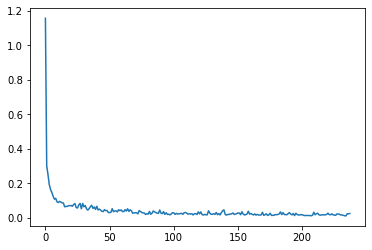

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)